# Fragment Spectrum Generation

Generating theoretical fragment spectra is central to many
identification tasks in computational mass spectrometry.
[TheoreticalSpectrumGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.TheoreticalSpectrumGenerator.html)
can be configured to generate
[MS2](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-MS2)
spectra from a given peptide charge combination. There are various
parameters which influence the generated ions e.g. simulating different
fragmentation techniques.

## Y-ion [Mass Spectrum](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mass-spectrum)

First, we will generate a simple mass spectrum that only contains y-ions

In [ ]:
import pyopenms as oms

tsg = oms.TheoreticalSpectrumGenerator()
spec1 = oms.MSSpectrum()
peptide = oms.AASequence.fromString("DFPIANGER")
# standard behavior is adding b- and y-ions of charge 1
p = oms.Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1)  # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

which produces all y single charged ions:

``` output
Spectrum 1 of DFPIANGER has 8 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
y4+ is generated at m/z 475.225939423771
y5+ is generated at m/z 546.2630535832709
y6+ is generated at m/z 659.3471179341709
y7+ is generated at m/z 756.3998821574709
y8+ is generated at m/z 903.4682964445709
```

which you could plot with
[pyopenms.plotting.plot_spectrum](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenmssubmodules/pyopenms.plotting.plot_spectrum.html),
automatically showing annotated ions.:

In [ ]:
import matplotlib.pyplot as plt
from pyopenms.plotting import plot_spectrum

plot_spectrum(spec1)
plt.show()

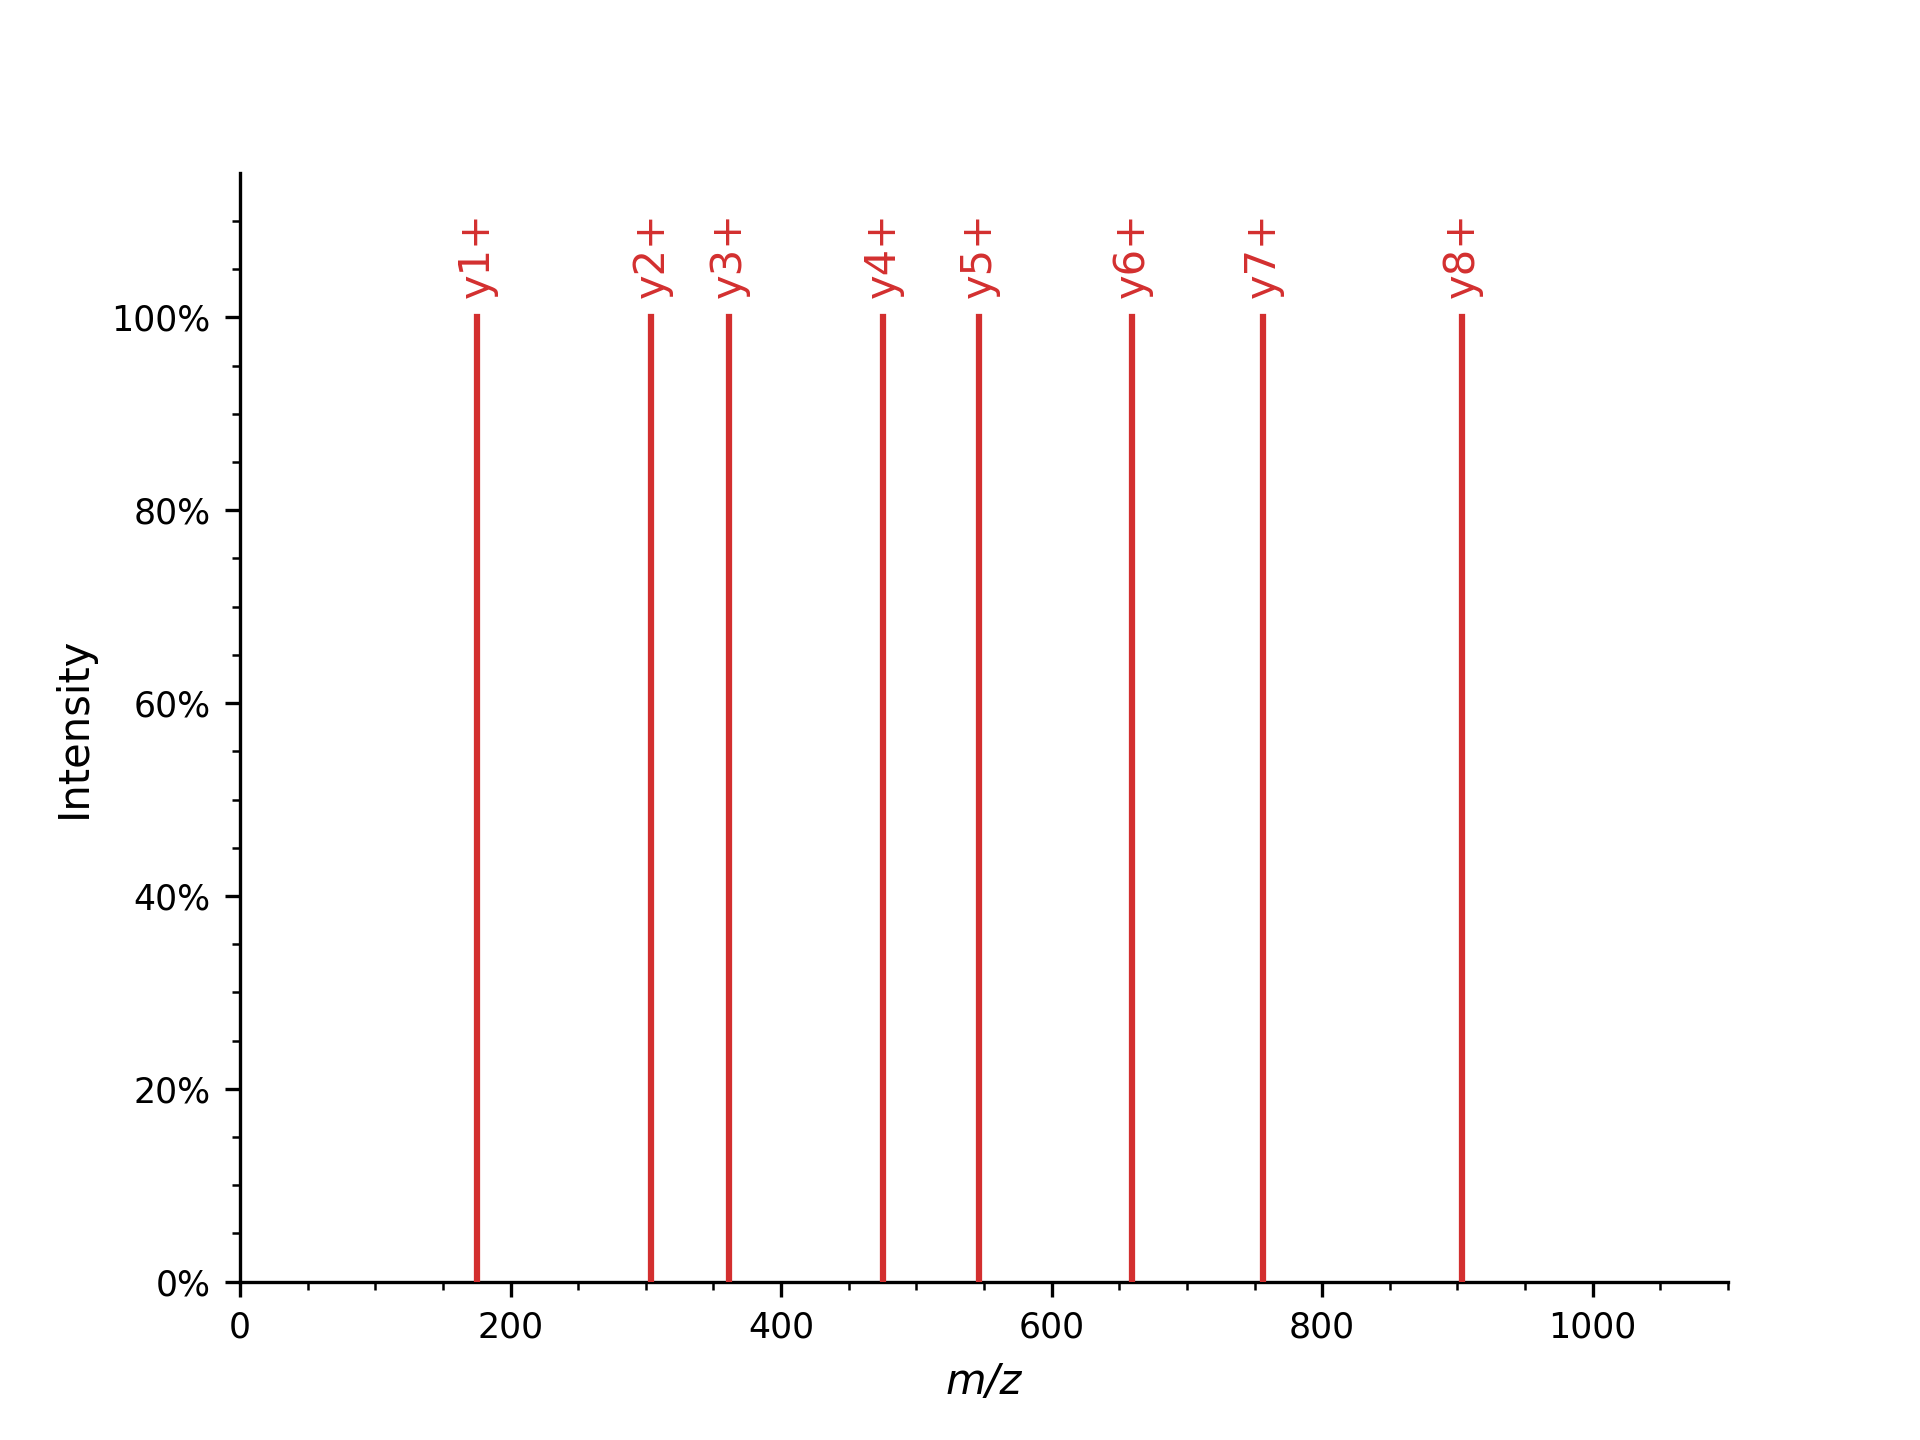

## Full Fragment Ion [Mass Spectrum](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-mass-spectrum)

We can also produce additional peaks in the fragment ion mass spectrum,
such as isotopic peaks, precursor peaks, ions from higher charge states,
additional ion series, or common neutral losses:

In [ ]:
spec2 = oms.MSSpectrum()
# standard behavior is adding b- and y-ions
p2 = oms.Param()
p2.setValue("add_a_ions", "true")
# adding n-term ion (in this case, a1 and b1)
p2.setValue("add_first_prefix_ion", "true")
p2.setValue("add_precursor_peaks", "true")
# standard is to add precursor peaks with only the largest charge
p2.setValue("add_all_precursor_charges", "true")
p2.setValue("add_losses", "true")
p2.setValue("add_metainfo", "true")
tsg.setParameters(p2)
tsg.getSpectrum(spec2, peptide, 1, 2)

# Iterate over annotated ions and their masses
print("Spectrum 2 of", peptide, "has", spec2.size(), "peaks.")
for ion, peak in zip(spec2.getStringDataArrays()[0], spec2):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

exp = oms.MSExperiment()
exp.addSpectrum(spec1)
exp.addSpectrum(spec2)
oms.MzMLFile().store("DFPIANGER.mzML", exp)

which outputs all 160 peaks that are generated (this is without isotopic
peaks), here we will just show the first few peaks:

``` output
Spectrum 2 of DFPIANGER has 160 peaks.
a1-H2O1++ is generated at m/z 35.518008514620995
a1++ is generated at m/z 44.523291046520995
b1-H2O1++ is generated at m/z 49.515466014621
b1++ is generated at m/z 58.520748546521
y1-C1H2N1O1++ is generated at m/z 66.05629515817103
y1-C1H2N2++ is generated at m/z 67.05221565817102
a1-H2O1+ is generated at m/z 70.02874056247099
y1-H3N1++ is generated at m/z 79.54984014222102
a1+ is generated at m/z 88.03930562627099
y1++ is generated at m/z 88.06311469007102
b1-H2O1+ is generated at m/z 98.02365556247099
a2-H2O1++ is generated at m/z 109.05221565817101
b1+ is generated at m/z 116.034220626271
a2++ is generated at m/z 118.05749819007102
b2-H2O1++ is generated at m/z 123.049673158171
[...]
```

which you can again visualize with:

In [ ]:
plot_spectrum(spec2, annotate_ions=False)
plt.show()

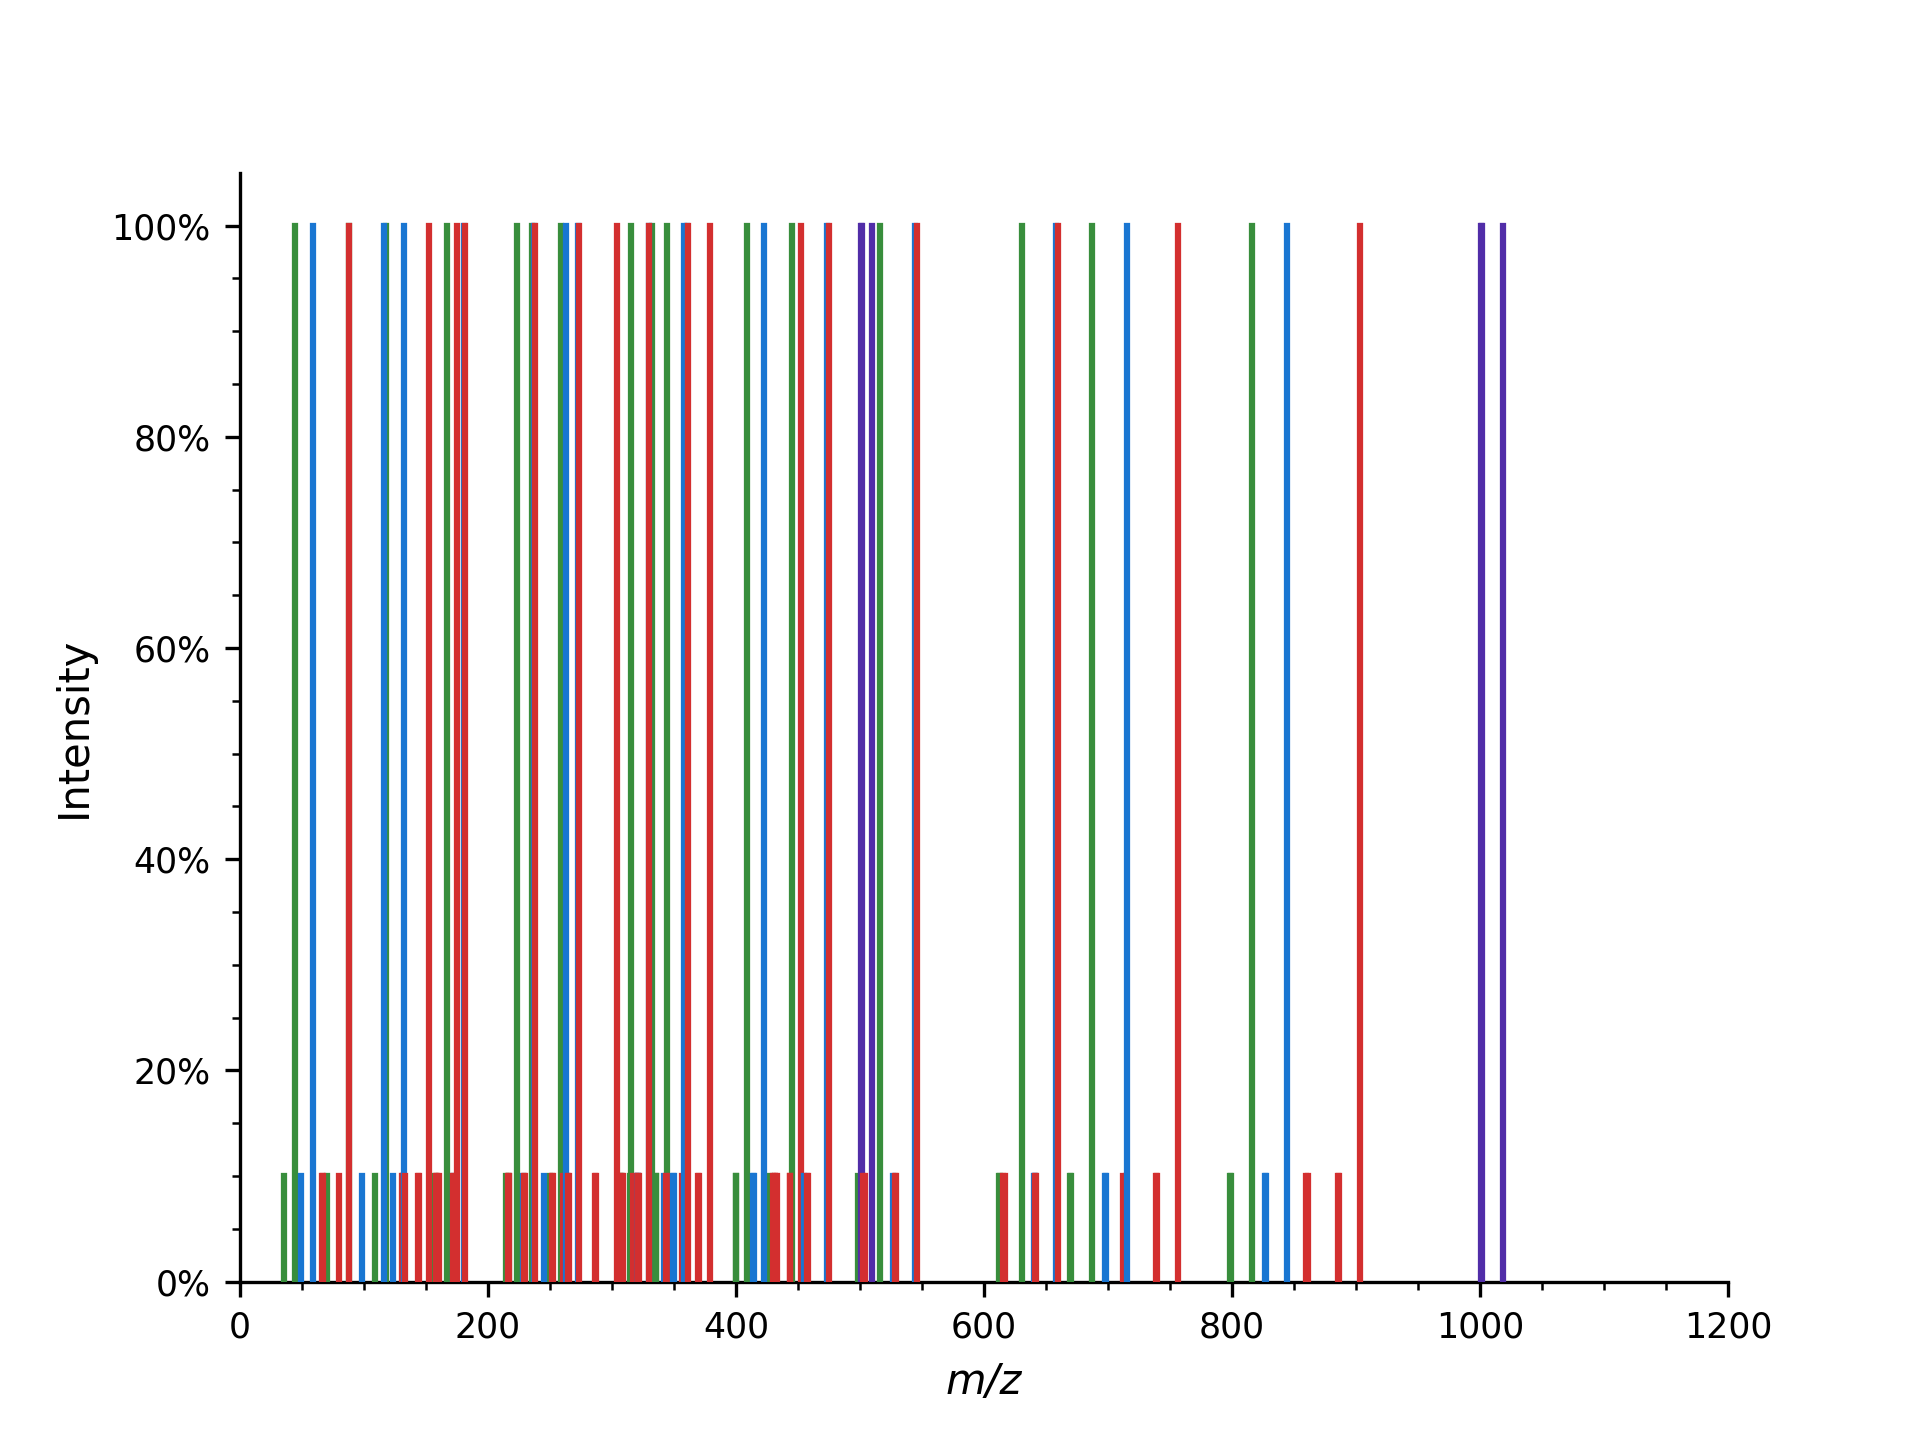

The first example shows how to put peaks of a certain type, y-ions in
this case, into a mass spectrum. The second mass spectrum is filled with
a complete fragment ion mass spectrum of all peaks (a-, b-, y-ions,
precursor peaks, and losses).

Here, from the peptide with 9 amino acids, fragments theoretically can
occur in 8 different positions, resulting in 8 peaks per ion type (a, b,
and y-ion in this example code). For instance, b-ions (prefix) and
y-ions (suffix) are complementary, so b3(DFP) and y6(IANGER) fragments
make up the peptide "DFPIANGER."

Adding precursor ions with the parameter `add_precursor_peaks` add 3
peaks with the largest charge states (precursor ion (M+H) and its loss
of water (\[M+H\]-H2O) or ammonia (\[M+H\]-NH3)). To include all
precursor ions with possible charge states, the
`add_all_precursor_charges` parameter should be set to true.

The losses are based on commonly observed fragment ion losses for
specific amino acids and are defined in the `Residues.xml` file, which
means that not all fragment ions will produce all possible losses, as
can be observed above: water loss is not observed for the y1 ion but for
the y2 ion since glutamic acid can have a neutral water loss but
arginine cannot. Similarly, only water loss and no ammonia loss is
simulated in the `a/b/c` ion series with the first fragment capable of
ammonia loss being asparagine at position 6.

The
[TheoreticalSpectrumGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.TheoreticalSpectrumGenerator.html)
has many parameters which have a detailed description located in the
class documentation. Note how the `add_metainfo` parameter populates the
[StringDataArray](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.StringDataArray.html)
of the output spectrum, allowing us to iterate over annotated ions and
their masses.

## Visualization

We can now visualize the resulting spectra using
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
when we open the DFPIANGER.mzML file that we produced above in
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView):

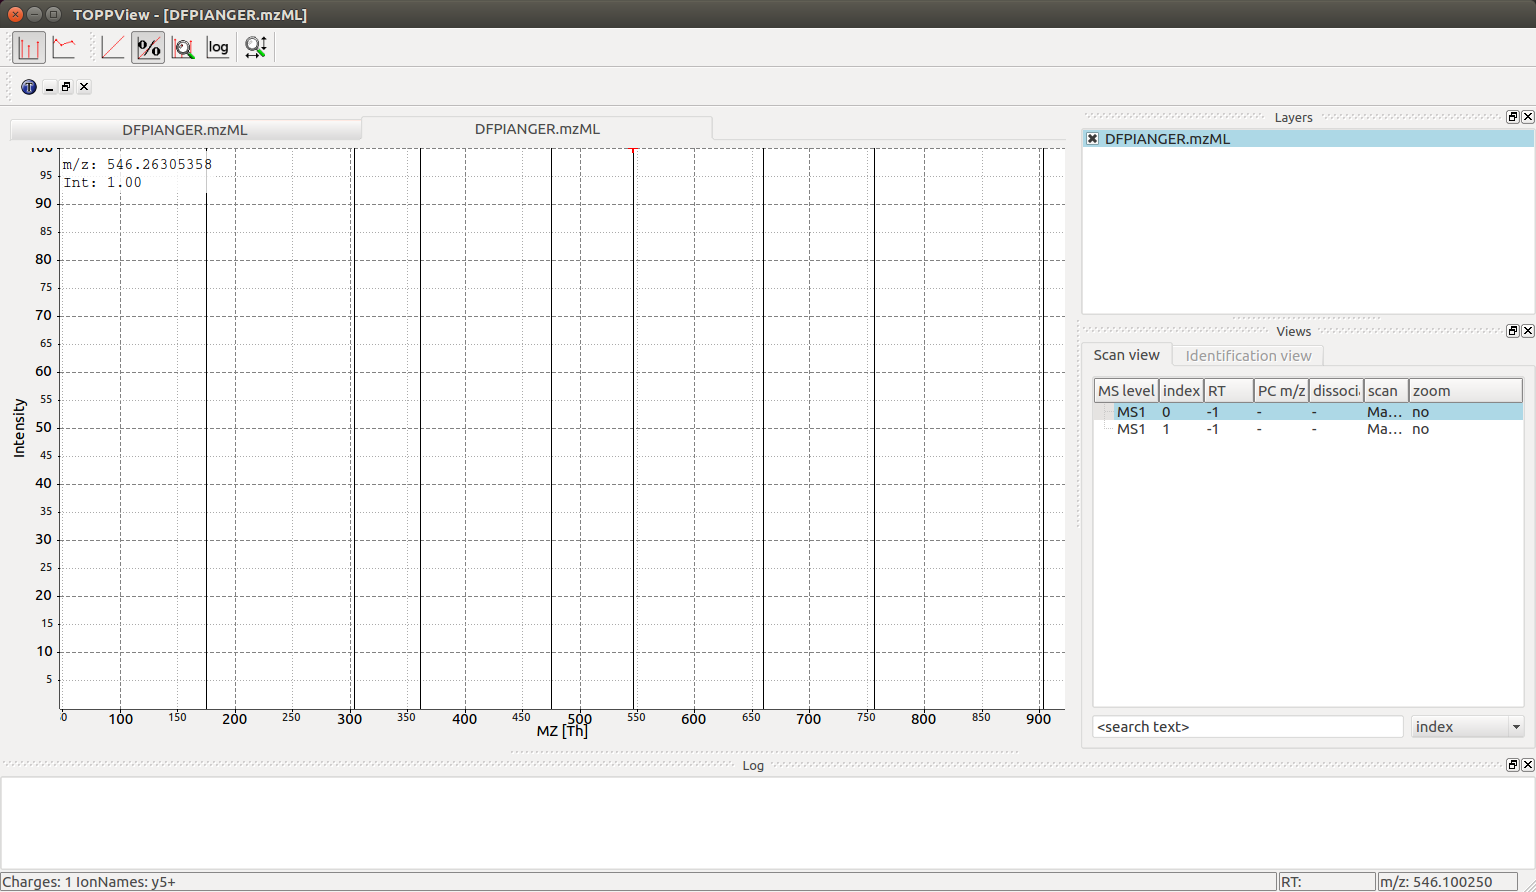

We can see all eight y ion peaks that are produced in the
[TheoreticalSpectrumGenerator](https://pyopenms.readthedocs.io/en/latest/apidocs/_autosummary/pyopenms/pyopenms.TheoreticalSpectrumGenerator.html)
and when we hover over one of the peaks ($546\ mz$ in this example)
there is an annotation in the bottom left corner that indicates charge
state and ion name (`y5+` for every peak). The larger spectrum with
$146$ peaks can also be interactively investigated with
[TOPPView](https://pyopenms.readthedocs.io/en/latest/user_guide/glossary.html#term-TOPPView)
(the second spectrum in the file):

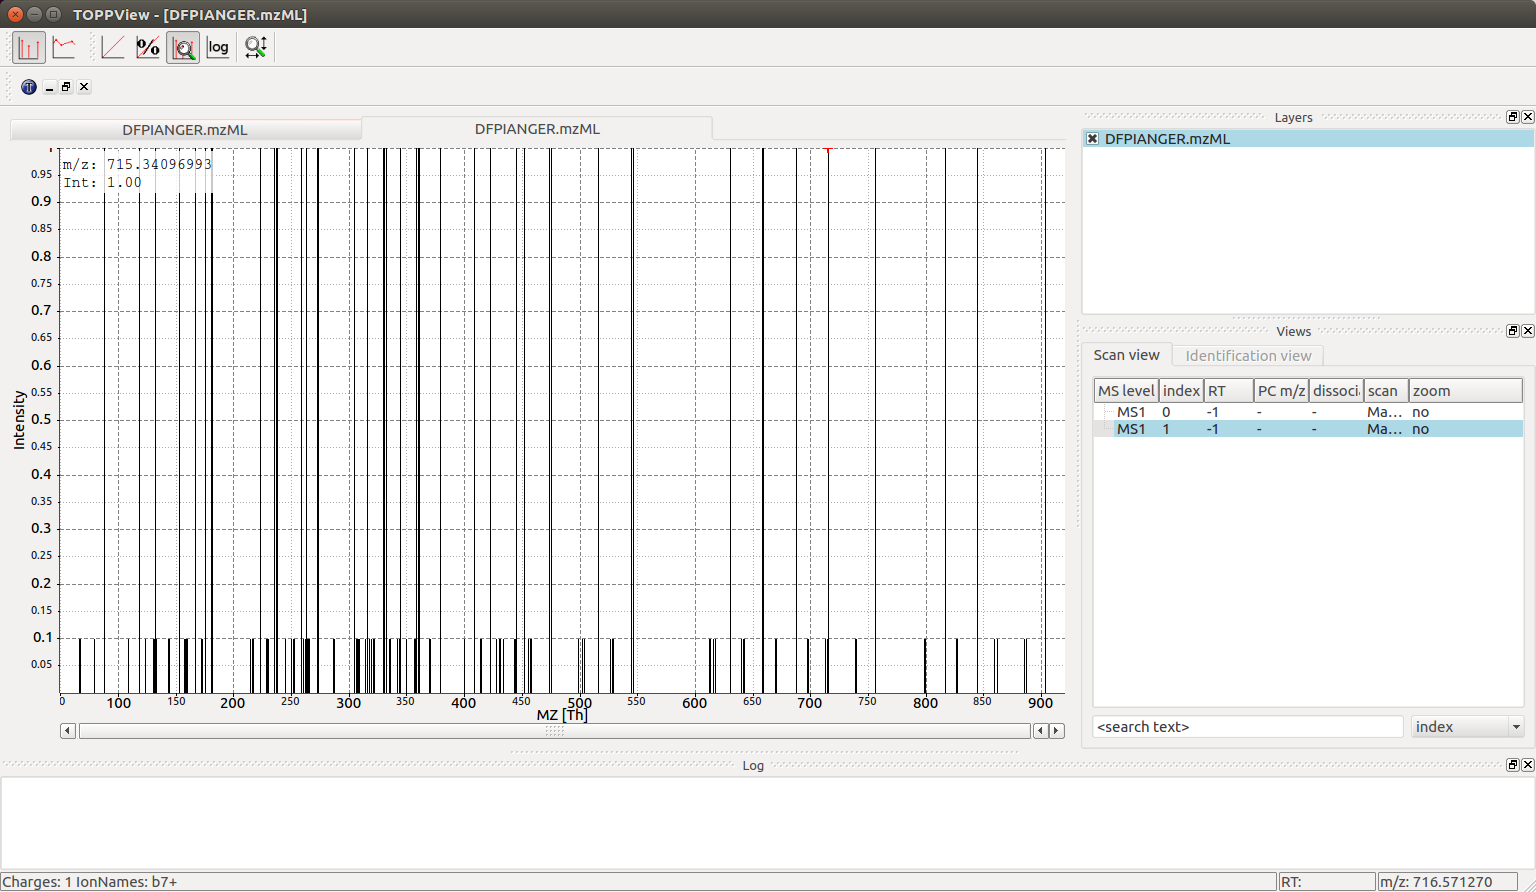

There are substantially more peaks here and the mass spectrum is much
busier, with singly and double charged peaks of the b, y and a series
creating $44$ different individual fragment ion peaks as well as neutral
losses adding an additional $102$ peaks (neutral losses easily
recognizable by their $10-fold$ lower intensity in the simulated
spectrum).